In [1]:
import pandas as pd
import numpy as np

#데이터 읽어오기
bridge = pd.read_csv('mydatabase.bridge.csv', parse_dates=["timestamp"])
residence = pd.read_csv('mydatabase.residence.csv', parse_dates=["timestamp"])
tunnel = pd.read_csv('mydatabase.tunnel.csv', parse_dates=["timestamp"])

#_id열 삭제
bridge = bridge.drop('_id', axis=1)
residence = residence.drop('_id', axis=1)
tunnel = tunnel.drop('_id', axis=1)

#NaN 제거
bridge = bridge.dropna()
residence = residence.dropna()
tunnel = tunnel.dropna()

In [2]:
#sensor 종류에 따른 분류
total = pd.concat([bridge,residence,tunnel])
vibration = total[total['sensorId'].str.startswith('vibration_')]
sound =total[total['sensorId'].str.startswith('sound_')]

In [3]:
#장소에 따른 분류
bridge_vibration =  bridge[bridge['sensorId'].str.startswith('vibration_')]
bridge_sound =bridge[bridge['sensorId'].str.startswith('sound_')]
residence_vibration =  residence[residence['sensorId'].str.startswith('vibration_')]
residence_sound =residence[residence['sensorId'].str.startswith('sound_')]
tunnel_vibration =  tunnel[tunnel['sensorId'].str.startswith('vibration_')]
tunnel_sound =tunnel[tunnel['sensorId'].str.startswith('sound_')]

In [4]:
#거리에 따른 분류
#Bbridge_vibration
bridge_vibration_100 = bridge_vibration[bridge_vibration['sensorId'].str.contains('100')]
bridge_vibration_300 = bridge_vibration[bridge_vibration['sensorId'].str.contains('300')]
bridge_vibration_500 = bridge_vibration[bridge_vibration['sensorId'].str.contains('500')]

#bridge_sound
bridge_sound_100 = bridge_sound[bridge_sound['sensorId'].str.contains('100')]
bridge_sound_300 = bridge_sound[bridge_sound['sensorId'].str.contains('300')]
bridge_sound_500 = bridge_sound[bridge_sound['sensorId'].str.contains('500')]

#residence_vibration
residence_vibration_100 = residence_vibration[residence_vibration['sensorId'].str.contains('100')]
residence_vibration_300 = residence_vibration[residence_vibration['sensorId'].str.contains('300')]
residence_vibration_500 = residence_vibration[residence_vibration['sensorId'].str.contains('500')]

residence_sound_100 = residence_sound[residence_sound['sensorId'].str.contains('100')]
residence_sound_300 = residence_sound[residence_sound['sensorId'].str.contains('300')]

#tunnel_vibration
tunnel_vibration_300 = tunnel_vibration[tunnel_vibration['sensorId'].str.contains('300')]
tunnel_vibration_500 = tunnel_vibration[tunnel_vibration['sensorId'].str.contains('500')]

#tunnel_sound
tunnel_sound_100 = tunnel_sound[tunnel_sound['sensorId'].str.contains('100')]
tunnel_sound_300 = tunnel_sound[tunnel_sound['sensorId'].str.contains('300')]


In [5]:
#시간에 따른 분류 - vibration
vibration_time = vibration.drop(columns=['sensorId','status','type'])
#시간에 따른 분류 - sound
sound_time = sound.drop(columns=['sensorId','status','type'])

In [6]:
#이상치 기준값 함수
def Remove_outliers(lst,str_,name):
    print(f"<-----{str_} : {name}----->")
    q1 = np.percentile(lst, 25)
    q2 = np.percentile(lst, 50)
    q3 = np.percentile(lst, 75)

    print("제1 사분위수 (Q1):", q1)
    print("제2 사분위수 (Q2 또는 중앙값):", q2)
    print("제3 사분위수 (Q3):", q3)
    iqr = q3 - q1
    lower_bound = max(q1 - 1.5 * iqr,0)
    upper_bound = q3 + 1.5 * iqr
    print("iqr :", iqr)
    print("이상치 제거 기준값(lower_bound): ",lower_bound)
    print("이상치 제거 기준값(upper_bound): ",upper_bound)
    print()

In [7]:
#장소에 대한 이상치 
bridge_vibration_measures = bridge_vibration['measures']
bridge_sound_measures=bridge_sound['measures']

residence_vibration_measures=residence_vibration['measures']
residence_sound_measures=residence_sound['measures'] 

tunnel_vibration_measures=tunnel_vibration['measures'] 
tunnel_sound_measures=tunnel_sound['measures']

In [8]:
Remove_outliers(bridge_vibration_measures, "Location", "bridge_vibration")
Remove_outliers(bridge_sound_measures, "Location", "bridge_sound")
Remove_outliers(residence_vibration_measures, "Location", "residence_vibration")
Remove_outliers(residence_sound_measures, "Location", "residence_sound")
Remove_outliers(tunnel_vibration_measures, "Location", "tunnel_vibration")
Remove_outliers(tunnel_sound_measures, "Location", "tunnel_sound")

<-----Location : bridge_vibration----->
제1 사분위수 (Q1): 6.0
제2 사분위수 (Q2 또는 중앙값): 27.0
제3 사분위수 (Q3): 30.0
iqr : 24.0
이상치 제거 기준값(lower_bound):  0
이상치 제거 기준값(upper_bound):  66.0

<-----Location : bridge_sound----->
제1 사분위수 (Q1): 252.0
제2 사분위수 (Q2 또는 중앙값): 270.0
제3 사분위수 (Q3): 288.0
iqr : 36.0
이상치 제거 기준값(lower_bound):  198.0
이상치 제거 기준값(upper_bound):  342.0

<-----Location : residence_vibration----->
제1 사분위수 (Q1): 5.0
제2 사분위수 (Q2 또는 중앙값): 31.0
제3 사분위수 (Q3): 42.0
iqr : 37.0
이상치 제거 기준값(lower_bound):  0
이상치 제거 기준값(upper_bound):  97.5

<-----Location : residence_sound----->
제1 사분위수 (Q1): 255.0
제2 사분위수 (Q2 또는 중앙값): 266.0
제3 사분위수 (Q3): 282.0
iqr : 27.0
이상치 제거 기준값(lower_bound):  214.5
이상치 제거 기준값(upper_bound):  322.5

<-----Location : tunnel_vibration----->
제1 사분위수 (Q1): 30.0
제2 사분위수 (Q2 또는 중앙값): 36.0
제3 사분위수 (Q3): 253.0
iqr : 223.0
이상치 제거 기준값(lower_bound):  0
이상치 제거 기준값(upper_bound):  587.5

<-----Location : tunnel_sound----->
제1 사분위수 (Q1): 264.0
제2 사분위수 (Q2 또는 중앙값): 276.0
제3 사분위수 (Q3): 295.0
iqr : 3

In [9]:
#Bridge 이상치 제거
bridge_vibration = bridge_vibration[(bridge_vibration['measures'] >= 0) & (bridge_vibration['measures'] <= 66.0)]
bridge_sound = bridge_sound[(bridge_sound['measures'] >= 198) & (bridge_sound['measures'] <= 342)]

#residence 이상치 제거
residence_vibration = residence_vibration[(residence_vibration['measures'] >= 0) & (residence_vibration['measures'] <= 97.5)]
residence_sound = residence_sound[(residence_sound['measures'] >= 214.5) & (residence_sound['measures'] <=322.5 )]

#tunnel 이상치 제거
tunnel_vibration = tunnel_vibration[(tunnel_vibration['measures'] >= 0) & (tunnel_vibration['measures'] <= 587.5)]
tunnel_sound = tunnel_sound[(tunnel_sound['measures'] >= 217.5) & (tunnel_sound['measures'] <=341.5 )]

In [ ]:
tunnel_sound

In [12]:
#Bridge_vibration
bridge_vibration_100_measures = bridge_vibration_100['measures']
bridge_vibration_300_measures=bridge_vibration_300['measures'] 
bridge_vibration_500_measures=bridge_vibration_500['measures']

#bridge_sound
bridge_sound_100_measures=bridge_sound_100['measures']
bridge_sound_300_measures=bridge_sound_300['measures']
bridge_sound_500_measures=bridge_sound_500['measures'] 

#residence_vibration
residence_vibration_100_measures=residence_vibration_100['measures']
residence_vibration_300_measures=residence_vibration_300['measures']
residence_vibration_500_measures=residence_vibration_500['measures']

#residence_sound
residence_sound_100_measures=residence_sound_100['measures']
residence_sound_300_measures=residence_sound_300['measures']

#tunnel_vibration
tunnel_vibration_300_measures=tunnel_vibration_300['measures']
tunnel_vibration_500_measures=tunnel_vibration_500['measures']

#tunnel_sound
tunnel_sound_100_measures=tunnel_sound_100['measures']
tunnel_sound_300_measures=tunnel_sound_300['measures']

In [13]:
Remove_outliers(bridge_vibration_100_measures, "Location", "bridge_vibration")
Remove_outliers(bridge_vibration_300_measures, "Location", "bridge_vibration")
Remove_outliers(bridge_vibration_500_measures, "Location", "bridge_vibration")

Remove_outliers(bridge_sound_100_measures, "Location", "bridgee_sound")
Remove_outliers(bridge_sound_300_measures, "Location", "bridgee_sound")
Remove_outliers(bridge_sound_500_measures, "Location", "bridgee_sound")

Remove_outliers(residence_vibration_100_measures, "Location", "residence_vibration")
Remove_outliers(residence_vibration_300_measures, "Location", "residence_vibration")
Remove_outliers(residence_vibration_500_measures, "Location", "residence_vibration")

Remove_outliers(residence_sound_100_measures, "Location", "residence_sound")
Remove_outliers(residence_sound_300_measures, "Location", "residence_sound")

Remove_outliers(tunnel_vibration_300_measures, "Location", "tunnel_vibration")
Remove_outliers(tunnel_vibration_500_measures, "Location", "tunnel_vibration")

Remove_outliers(tunnel_sound_100_measures, "Location", "tunnel_sound")
Remove_outliers(tunnel_sound_300_measures, "Location", "tunnel_sound")

<-----Location : bridge_vibration----->
제1 사분위수 (Q1): 27.0
제2 사분위수 (Q2 또는 중앙값): 27.0
제3 사분위수 (Q3): 28.0
iqr : 1.0
이상치 제거 기준값(lower_bound):  25.5
이상치 제거 기준값(upper_bound):  29.5

<-----Location : bridge_vibration----->
제1 사분위수 (Q1): 30.0
제2 사분위수 (Q2 또는 중앙값): 31.0
제3 사분위수 (Q3): 31.0
iqr : 1.0
이상치 제거 기준값(lower_bound):  28.5
이상치 제거 기준값(upper_bound):  32.5

<-----Location : bridge_vibration----->
제1 사분위수 (Q1): 4.0
제2 사분위수 (Q2 또는 중앙값): 5.0
제3 사분위수 (Q3): 6.0
iqr : 2.0
이상치 제거 기준값(lower_bound):  1.0
이상치 제거 기준값(upper_bound):  9.0

<-----Location : bridgee_sound----->
제1 사분위수 (Q1): 228.0
제2 사분위수 (Q2 또는 중앙값): 242.0
제3 사분위수 (Q3): 259.0
iqr : 31.0
이상치 제거 기준값(lower_bound):  181.5
이상치 제거 기준값(upper_bound):  305.5

<-----Location : bridgee_sound----->
제1 사분위수 (Q1): 267.0
제2 사분위수 (Q2 또는 중앙값): 280.0
제3 사분위수 (Q3): 298.0
iqr : 31.0
이상치 제거 기준값(lower_bound):  220.5
이상치 제거 기준값(upper_bound):  344.5

<-----Location : bridgee_sound----->
제1 사분위수 (Q1): 266.0
제2 사분위수 (Q2 또는 중앙값): 277.0
제3 사분위수 (Q3): 290.0
iqr : 24.0

In [14]:
#Bridge 이상치 제거
bridge_vibration_100 = bridge_vibration_100[(bridge_vibration_100['measures'] >= 25.5) & (bridge_vibration_100['measures'] <= 29.5)]
bridge_vibration_300 = bridge_vibration_300[(bridge_vibration_300['measures'] >= 28.5) & (bridge_vibration_300['measures'] <= 32.5)]
bridge_vibration_500 = bridge_vibration_500[(bridge_vibration_500['measures'] >= 1) & (bridge_vibration_500['measures'] <= 9)]

bridge_sound_100 = bridge_sound_100[(bridge_sound_100['measures'] >= 181.5) & (bridge_sound_100['measures'] <= 305.5)]
bridge_sound_300 = bridge_sound_300[(bridge_sound_300['measures'] >= 220.5) & (bridge_sound_300['measures'] <= 344.5)]
bridge_sound_500 = bridge_sound_500[(bridge_sound_500['measures'] >= 230) & (bridge_sound_500['measures'] <= 326)]

#residence 이상치 제거
residence_vibration_100 = residence_vibration_100[(residence_vibration_100['measures'] >= 0) & (residence_vibration_100['measures'] <= 8)]
residence_vibration_300 = residence_vibration_300[(residence_vibration_300['measures'] >= 18.5) & (residence_vibration_300['measures'] <= 46.5)]
residence_vibration_500 = residence_vibration_500[(residence_vibration_500['measures'] >= 19.5) & (residence_vibration_500['measures'] <= 79.5)]

residence_sound_100 = residence_sound_100[(residence_sound_100['measures'] >= 216) & (residence_sound_100['measures'] <= 328)]
residence_sound_300 = residence_sound_300[(residence_sound_300['measures'] >= 214.5) & (residence_sound_300['measures'] <= 314.5)]

#tunnel 이상치 제거
tunnel_vibration_300 = tunnel_vibration_300[(tunnel_vibration_300['measures'] >= 34.5) & (tunnel_vibration_300['measures'] <= 38.5)]
tunnel_vibration_500 = tunnel_vibration_500[(tunnel_vibration_500['measures'] >= 0) & (tunnel_vibration_500['measures'] <= 620)]

tunnel_sound_100 = tunnel_sound_100[(tunnel_sound_100['measures'] >= 226.0) & (tunnel_sound_100['measures'] <= 346.0)]
tunnel_sound_300 = tunnel_sound_300[(tunnel_sound_300['measures'] >= 210) & (tunnel_sound_300['measures'] <= 330)]

In [15]:
#시간에 따른 분류 - vibration
vibration_time_measures = vibration_time['measures']
#시간에 따른 분류 - sound
sound_time_measures = sound_time['measures']

In [16]:
Remove_outliers(vibration_time_measures, "time", "vibration_time")
Remove_outliers(sound_time_measures, "time", "sound_time")

<-----time : vibration_time----->
제1 사분위수 (Q1): 27.0
제2 사분위수 (Q2 또는 중앙값): 30.0
제3 사분위수 (Q3): 37.0
iqr : 10.0
이상치 제거 기준값(lower_bound):  12.0
이상치 제거 기준값(upper_bound):  52.0

<-----time : sound_time----->
제1 사분위수 (Q1): 256.0
제2 사분위수 (Q2 또는 중앙값): 271.0
제3 사분위수 (Q3): 289.0
iqr : 33.0
이상치 제거 기준값(lower_bound):  206.5
이상치 제거 기준값(upper_bound):  338.5



In [28]:
vibration_time = vibration_time[(vibration_time['measures'] >= 12) & (vibration_time['measures'] <= 52)]
sound_time = sound_time[(sound_time['measures'] >= 206) & (sound_time['measures'] <= 338)]


In [30]:
vibration_time

,measures
timestamp,
2023-11-22 19:02:26.940000+00:00,27.0
2023-11-22 19:02:27.257000+00:00,30.0
2023-11-22 19:02:27.918000+00:00,27.0
2023-11-22 19:02:28.209000+00:00,31.0
2023-11-22 19:02:28.948000+00:00,27.0
...,...
2023-12-14 18:40:43.471000+00:00,30.0
2023-12-14 18:40:44.243000+00:00,36.0
2023-12-14 18:40:44.473000+00:00,30.0


KeyError: 'timestamp'

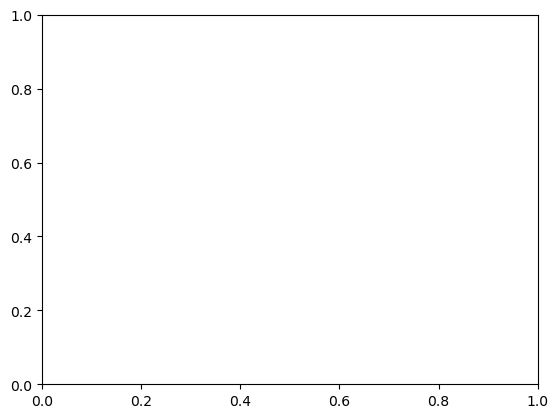

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# "timestamp" 열을 Datetime 형식으로 변환

fig, ax = plt.subplots()

ax.plot(vibration_time["timestamp"], vibration_time["measures"])

ax.set_xlabel("Date")
ax.set_title("Time")
ax.legend().set_visible(False)

vibration_time.set_index("timestamp", inplace=True)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.set_ylim(0, 200)
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


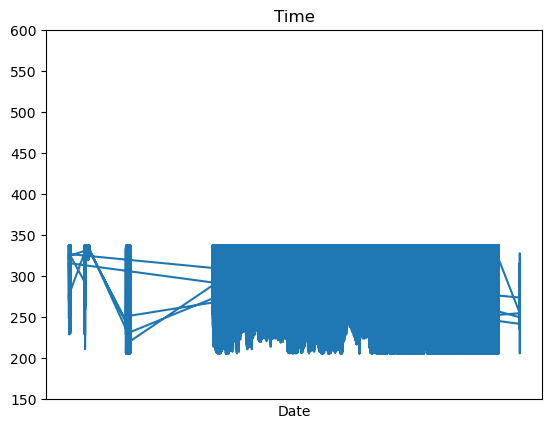

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# "timestamp" 열을 Datetime 형식으로 변환

fig, ax = plt.subplots()

ax.plot(sound_time["timestamp"], sound_time["measures"])

ax.set_xlabel("Date")
ax.set_title("Time")
ax.legend().set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

ax.set_ylim(150, 600)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# "timestamp" 열을 Datetime 형식으로 변환
vibration_time["timestamp"].plot()

fig, ax = plt.subplots()

ax.plot(vibration_time["timestamp"], vibration_time["measures"])

ax.set_xlabel("Date")
ax.set_title("Time")
ax.legend().set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))


In [ ]:
# matplotlib 사용
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
try:
    fig, ax = plt.subplots()

    ax.plot(vibration_time["timestamp"], vibration_time["measures"])

    ax.set_xlabel("Date")
    ax.set_title("Time")

    ax.xaxis.set_major_locator(MultipleLocator(1000))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
except:
    plt.show()


In [31]:
def calculate_statistics(dataframe,str_):
    # 데이터프레임의 'measures' 열에서 통계치 계산
    mean_value = np.mean(dataframe['measures'])
    std_dev = np.std(dataframe['measures'])
    q1 = np.percentile(dataframe['measures'], 25)
    q3 = np.percentile(dataframe['measures'], 75)

    # 결과를 데이터프레임으로 생성
    result_df = pd.DataFrame({
        'key': ['STD', 'Q1', 'MEAN', 'Q3'],
        f'{str_}': [std_dev, q1, mean_value, q3]
    })

    return result_df

In [ ]:
"""
bridge_vibration_100
bridge_vibration_300
bridge_vibration_500

bridge_sound_100
bridge_sound_300
bridge_sound_500

residence_vibration_100
residence_vibration_300
residence_vibration_500

residence_sound_100
residence_sound_300

tunnel_vibration_300
tunnel_vibration_500

tunnel_sound_100
tunnel_sound_300

vibration_time
sound_time

bridge_vibration 
bridge_sound 

residence_vibration 
residence_sound

tunnel_vibration
tunnel_sound 
"""

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


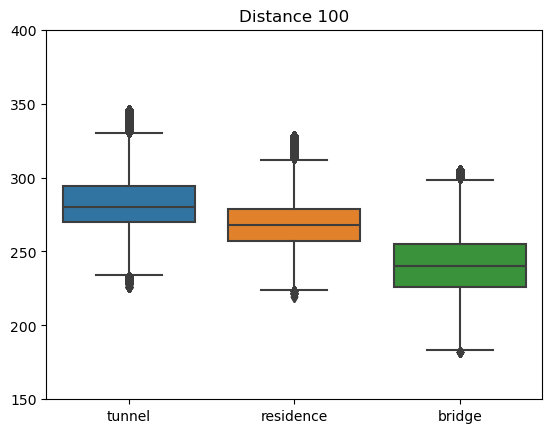

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'tunnel': tunnel_sound_100['measures'],
    'residence': residence_sound_100['measures'],
    'bridge': bridge_sound_100['measures'],
}
df = pd.DataFrame(data)
ax = sns.boxplot(data=df)
ax.set_xticklabels(['tunnel', 'residence', 'bridge'])
plt.ylim(150, 400)
plt.title("Distance 100")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

data = {"apple": 10, "orange": 15, "lemon": 5, "lime": 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
axs[0, 1].boxplot([bridge_vibration_100['measures'], bridge_vibration_300['measures'], bridge_vibration_500['measures']])
axs[0, 1].set_xticklabels(['bridge 100', 'bridge 300', 'bridge 500'])
axs[0, 1].set_ylim(0, 100)
axs[0, 1].set_title("Same Location Distance")

# axs[0, 2].plot(names, values)
# axs[0, 2].set_title("Time")

# axs[1, 0].boxplot(names, values)
# axs[1, 0].set_title("Distance 100")

# axs[1, 1].boxplot(names, values)
# axs[1, 1].set_title("Distance 300")

# axs[1, 2].boxplot(names, values)
# axs[1, 2].set_title("Distance 500")
fig.suptitle("   Fig 16. Vibration Data Visualization", fontsize=20)

plt.show()

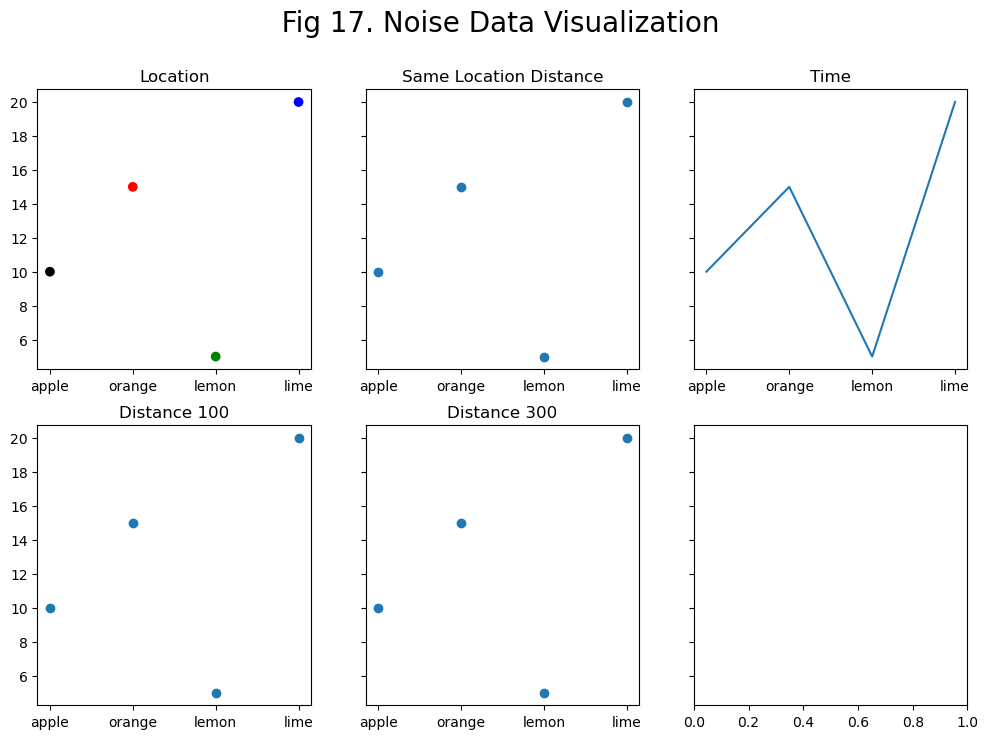

In [119]:
import matplotlib.pyplot as plt

data = {"apple": 10, "orange": 15, "lemon": 5, "lime": 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)

axs[0, 0].scatter(names, values, color=['black', 'red', 'green', 'blue'])
axs[0, 0].set_title("Location")

axs[0, 1].scatter(names, values)
axs[0, 1].set_title("Same Location Distance")

axs[0, 2].plot(names, values)
axs[0, 2].set_title("Time")

axs[1, 0].scatter(names, values)
axs[1, 0].set_title("Distance 100")

axs[1, 1].scatter(names, values)
axs[1, 1].set_title("Distance 300")

fig.suptitle("   Fig 17. Noise Data Visualization", fontsize=20)

plt.show()

In [85]:
vibration_time = vibration_time.drop(columns=['type'])
sound_time = sound_time.drop(columns=['type'])
sound_time

,measures,timestamp
1,277.0,2023-11-22T19:02:27.253Z
3,259.0,2023-11-22T19:02:27.276Z
5,328.0,2023-11-22T19:02:27.490Z
7,312.0,2023-11-22T19:02:28.058Z
9,248.0,2023-11-22T19:02:28.252Z
...,...,...
6276689,283.0,2023-12-14T18:40:44.065Z
6276693,252.0,2023-12-14T18:40:44.977Z
6276694,277.0,2023-12-14T18:40:45.067Z
6276698,242.0,2023-12-14T18:40:45.979Z


In [90]:
bridge_sound_100 = bridge_sound_100.reset_index()
bridge_sound_300 = bridge_sound_300.reset_index()
bridge_sound_500 = bridge_sound_500.reset_index()

residence_sound_100 = residence_sound_100.reset_index()
residence_sound_300 = residence_sound_300.reset_index()

tunnel_sound_100 = tunnel_sound_100.reset_index()
tunnel_sound_300 = tunnel_sound_300.reset_index()


In [97]:
result = calculate_statistics(bridge_sound_300,'bridge_sound_300')
result

,key,bridge_sound_300
0,STD,22.156110
1,Q1,265.000000
2,MEAN,280.578128
3,Q3,292.000000


In [98]:
temp = calculate_statistics(residence_sound_300,'residence_sound_300')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,bridge_sound_300,residence_sound_300
0,STD,22.156110,17.530884
1,Q1,265.000000,249.000000
2,MEAN,280.578128,262.106820
3,Q3,292.000000,272.000000


In [99]:
temp = calculate_statistics(tunnel_sound_300,'tunnel_sound_300')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,bridge_sound_300,residence_sound_300,tunnel_sound_300
0,STD,22.156110,17.530884,21.503280
1,Q1,265.000000,249.000000,253.000000
2,MEAN,280.578128,262.106820,268.640032
3,Q3,292.000000,272.000000,279.000000


In [77]:
temp = calculate_statistics(residence_vibration_100,'residence_vibration_100')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,bridge_vibration_100,residence_vibration_100
0,STD,0.527972,1.442901
1,Q1,27.000000,3.000000
2,MEAN,27.330152,3.974105
3,Q3,28.000000,5.000000


In [79]:
temp = calculate_statistics(residence_vibration_300,'residence_vibration_300')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,bridge_vibration_300,residence_vibration_300
0,STD,0.584990,3.619859
1,Q1,30.000000,29.000000
2,MEAN,30.568921,32.506469
3,Q3,31.000000,36.000000


In [73]:
temp = calculate_statistics(residence_vibration_500,'residence_vibration_500')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,bridge_vibration_100,bridge_vibration_300,bridge_vibration_500,residence_vibration_100,residence_vibration_300,residence_vibration_500
0,STD,0.527972,0.584990,1.731763,1.442901,3.619859,10.808605
1,Q1,27.000000,30.000000,4.000000,3.000000,29.000000,42.000000
2,MEAN,27.330152,30.568921,4.965251,3.974105,32.506469,50.516861
3,Q3,28.000000,31.000000,6.000000,5.000000,36.000000,57.000000


In [80]:
temp = calculate_statistics(tunnel_vibration_300,'tunnel_vibration_300')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,bridge_vibration_300,residence_vibration_300,tunnel_vibration_300
0,STD,0.584990,3.619859,0.487334
1,Q1,30.000000,29.000000,36.000000
2,MEAN,30.568921,32.506469,36.351849
3,Q3,31.000000,36.000000,37.000000


In [83]:
temp = calculate_statistics(tunnel_vibration_500,'tunnel_vibration_500')
result = pd.merge(result,temp, on='key', how='inner')
result

,key,residence_vibration_500,bridge_vibration_500,tunnel_vibration_500
0,STD,10.808605,1.731763,123.516015
1,Q1,42.000000,4.000000,30.000000
2,MEAN,50.516861,4.965251,151.434112
3,Q3,57.000000,6.000000,266.000000


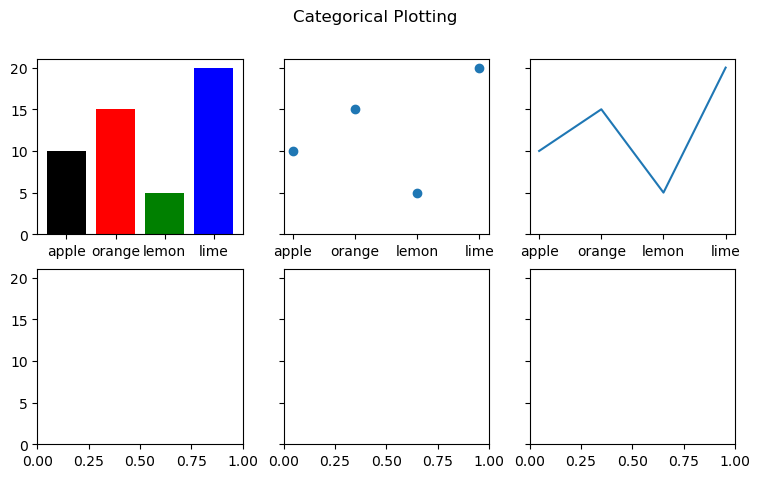